In [1]:
import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(0, '/home/ubuntu/Documents/NMDinStars/mesa_mod/mesa-r12778/star/test_suite/NeutrinoMagneticDipoleMesa')

from MesaOutput import MesaOutput
from mesa_reader import MesaData

import seaborn as sb
sb.set(context='talk', style='whitegrid', palette='Set1')

plt.rcParams["font.family"] = "serif"

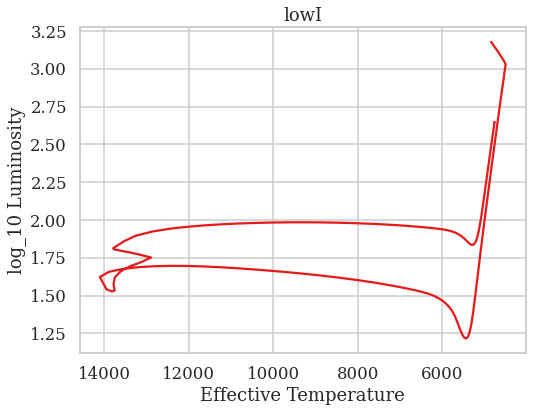

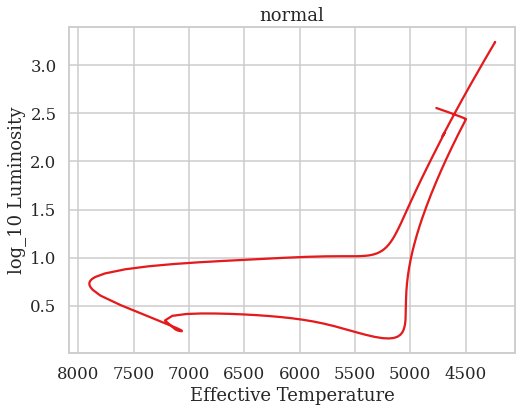

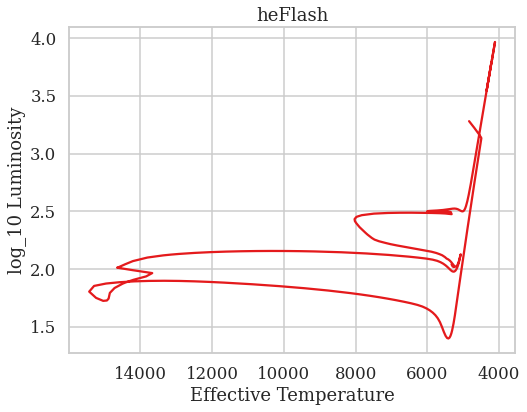

In [2]:
files = glob.glob('/home/ubuntu/Documents/NMDinStars/mesa_mod/mesa-r12778/star/test_suite/NeutrinoMagneticDipoleMesa/LOGS/*.data')

for f in files:
    fig, ax = plt.subplots(1, figsize=(8,6))
    
    m = MesaData(f)
    
    ax.plot(m.effective_T, m.log_L)
    
    ax.set_xlabel('Effective Temperature')
    ax.set_ylabel('log_10 Luminosity')
    
    ax.set_title(f.split('/')[-1].split('_')[-1].split('.')[0])
    
    plt.gca().invert_xaxis()

('model_number', 'star_age', 'star_mass', 'mass_conv_core', 'power_he_burn', 'effective_T', 'log_L', 'log_R', 'log_g', 'log_center_T', 'log_center_Rho', 'center_h1', 'center_he4', 'surface_h1', 'surface_fe56')
('model_number', 'star_age', 'star_mass', 'mass_conv_core', 'power_he_burn', 'effective_T', 'log_L', 'log_R', 'log_g', 'log_center_T', 'log_center_Rho', 'center_h1', 'center_he4', 'surface_h1', 'surface_fe56')
('model_number', 'star_age', 'star_mass', 'mass_conv_core', 'power_he_burn', 'effective_T', 'log_L', 'log_R', 'log_g', 'log_center_T', 'log_center_Rho', 'center_h1', 'center_he4', 'surface_h1', 'surface_fe56')


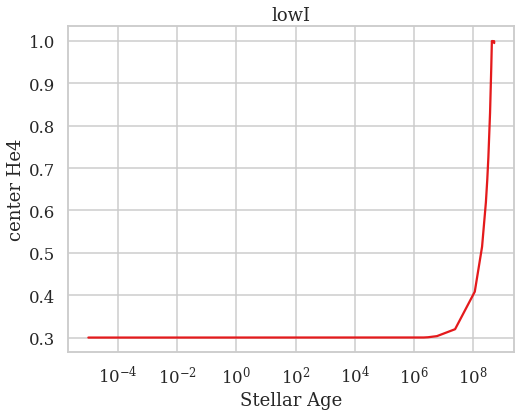

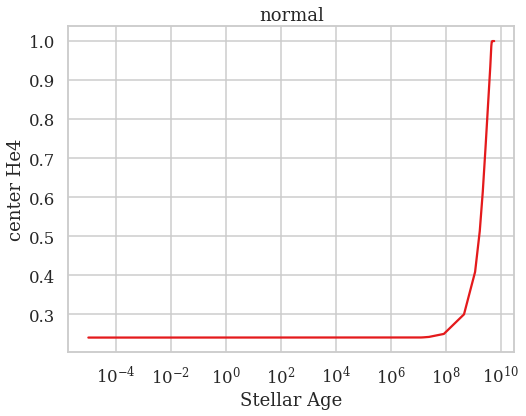

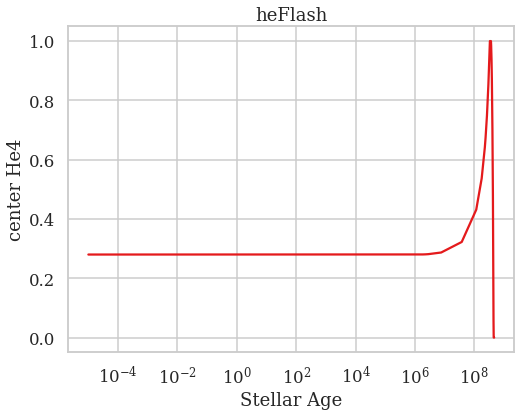

In [3]:
for f in files:
    fig, ax = plt.subplots(1, figsize=(8,6))
    
    m = MesaData(f)
    
    print(m.bulk_names)
    
    ax.plot(m.star_age, m.center_he4)
    
    ax.set_xlabel('Stellar Age')
    ax.set_ylabel('center He4')
    
    ax.set_title(f.split('/')[-1].split('_')[-1].split('.')[0])
    ax.set_xscale('log')

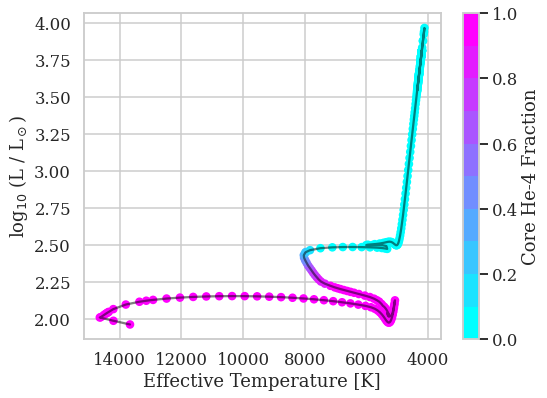

In [66]:
# Look into helium flash more 

# plot HR diagram
f = files[-1]

fig, ax = plt.subplots(1, figsize=(8,6))
    
m = MesaData(f)

h1 = np.array(m.center_h1)
whereZAMS = np.where(h1 < 0.1)[0]

he4 = np.array(m.center_he4)[whereZAMS]
T = np.array(m.effective_T)[whereZAMS]
L = np.array(m.log_L)[whereZAMS]

ax.plot(T, L, 'k', alpha=0.5)

ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'log$_{10}$ (L / L$_\odot$)')

# add he4 in core points on the plot

cm = plt.cm.get_cmap('cool', 10)

sc = ax.scatter(T, L, marker='o', 
                c=he4, vmin=0, vmax=1, s=50, cmap=cm)
colorbar = fig.colorbar(sc, filled=True)

colorbar.set_label('Core He-4 Fraction')

plt.gca().invert_xaxis()
fig.savefig('He4_HRdiagram.jpeg', transparent=False, bbox_inches='tight')

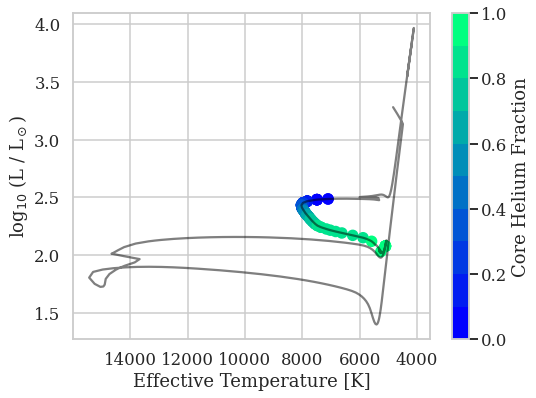

In [50]:
# Look into helium flash more 

# plot HR diagram
f = files[-1]

fig, ax = plt.subplots(1, figsize=(8,6))
    
m = MesaData(f)

T = np.array(m.effective_T)
L = np.array(m.log_L)

ax.plot(T, L, 'k', alpha=0.5)

ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'log$_{10}$ (L / L$_\odot$)')

# add he4 in core points on the plot
# select points only after he4 = 1
he4 = np.array(m.center_he4)
#where1 = np.where(he4 > 0.999)[0][-1]

toPlot = np.arange(0, 1.0, 0.01)
epsilon = 0.08
idxs = []
for val in toPlot:
    where = np.where(np.abs(he4[where1:]-val) < epsilon)[0][0]
    idxs.append(where)
    
idxs = np.array(idxs)

cm = plt.cm.get_cmap('winter', 10)
sc = ax.scatter(T[where1:][idxs], L[where1:][idxs], marker='o', 
                c=toPlot, vmin=0, vmax=1, s=100, cmap=cm)

colorbar = fig.colorbar(sc, filled=True)

colorbar.set_label('Core Helium Fraction')

plt.gca().invert_xaxis()

In [57]:
m.center_h1

array([7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
       7.19724000e-01, 7.19724000e-01, 7.19724000e-01, 7.19724000e-01,
      